# Assignment 9, Part 2: Matplotlib -- Seaborn

*Introduction to plotting with `Seaborn`.*

## Instructions
This tutorial provides step-by-step training divided into numbered sections. The sections often contain embeded exectable code for demonstration.  This tutorial is accompanied by a practice notebook with the exact same name but with a `-Practice` suffix.  Throughout this tutorial sections labeled "Practice Task" are interspersed and indicated with the icon: ![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/16/Apps-gnome-info-icon.png).

You should follow the instructions provided in these sections by performing them in the practice notebook.  When the tutorial is completed you can turn in the final practice notebook. 


## Introduction

[Seaborn](https://seaborn.pydata.org/) is a statistical data vizualization library based on `matplotlib` that provides a higher-level interface than what we used in Part 1. This library is extremely usefull for producing 'standard' or otherwise common plots. It is a collection of plotting functions written using `matplotlib`.

This notebook will be based on the [official seaborn tutorial](https://seaborn.pydata.org/tutorial.html)

---
## 1. Getting Started
Before we get started we need to import the `seaborn`, `pandas`, `numpy` and `matplotlib` packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Task 1a Setup

<span style="float:right; margin-left:10px; clear:both;">![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/96/Apps-gnome-info-icon.png)
</span>

Import the following packages:
+ seaborn as sns
+ pandas as pd
+ numpy as np
+ matplotlib.pyplot as plt

Activate the `%matplotlib inline` magic.

---
## 2. Seaborn Introduction

The API to `seaborn` contains functions for mulitple types of plots including: relational, scatter, line, a variety for categorical data, distributions, regressions, and heatmaps. In addition it provides some functions for creating color palettes. You can see a complete list on functions on the [API Reference page](https://seaborn.pydata.org/api.html).

Seaborn provides an [example gallary](https://seaborn.pydata.org/examples/index.html) of plots.  As an example, we've been working with the iris dataset in the previous tutorials.  Below is an example of a plot created by Seaborn displaying all pair-wise scatterplots of the iris dataset:

![seaborn iris plot](https://seaborn.pydata.org/_images/seaborn-pairplot-4.png)

`Seaborn` comes with a few demo datasets. These can be disovered by calling (ignore the warning message):

In [2]:
sns.get_dataset_names()

C:\Users\dslim\Anaconda3\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\Users\dslim\Anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

Observe that the iris dataset we've been using recently is included!  You can load any dataset you want to practice with using the `load_dataset` function. For example to view the iris dataset:

In [3]:
iris_df = sns.load_dataset('iris')
iris_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


And another dataset containing restaurant tip data:

In [4]:
tips = sns.load_dataset('tips')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Seaborn helps us achieve beautiful plots using both `pandas` and `matplotlib` but with much fewer lines of code.  The first function listed in both the Seaborn tutorial and the API documenation is `sns.relplot`, so our dive into Seaborn will begin there.  To demonstrate this, we can recreate the pair-wise scatterplot above with the following single line of code:

C:\Users\dslim\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


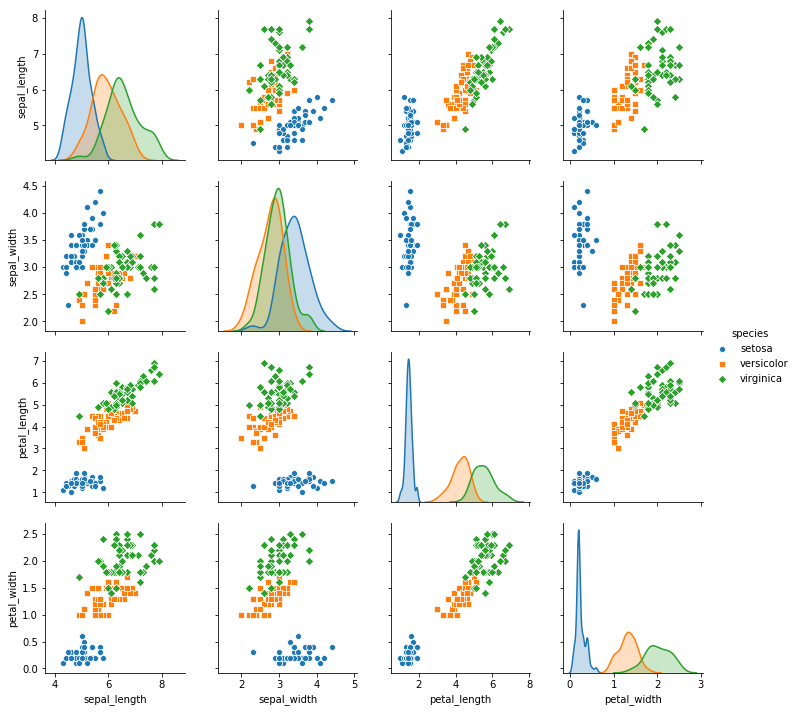

In [5]:
sns.pairplot(iris_df, hue="species", markers=["o", "s", "D"])

#### Task 2a Load Data

<span style="float:right; margin-left:10px; clear:both;">![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/96/Apps-gnome-info-icon.png)
</span>

+ View available datasets by calling `sns.get_dataset_names`.
+ Choose one of those datasets to use for the tasks in this notebook.
+ Examine the dataframe.
    + What is the shape?
    + What are the columns?
    + What are the data types?

#### Task 2b Preview Seaborn

<span style="float:right; margin-left:10px; clear:both;">![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/96/Apps-gnome-info-icon.png)
</span>

Take some time to peruse the Seaborn [example gallary](https://seaborn.pydata.org/examples/index.html).  Provide a list of some types of plots that will be useful for your research and possibly for your final project:

---
## 3. Visualizing Relationships

***Note:*** The following instructions are derived from content on Seaborn's 
[Visualization statistical relationships](https://seaborn.pydata.org/tutorial/relational.html) page.

Seaborn provides three functions for plotting relationships between data: `relplot`, `scatterplot` and `lineplot`.  In practice, we can use the `replot` function to create both scatterplots and line plots. By default it provides a scatterplot.

To use `sns.relplot` we must provide the data to be plotted using the `data` parameter, while `x` and `y` data points are delineated by their column labels in the data. As an example, let's explore the tips data provided by Seaborn using the `sns.relplot` function. We imported the data in section 2, therefore, as a reminder, let's examine the data:

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Now, let's plot the relationship between the tip and total bill:

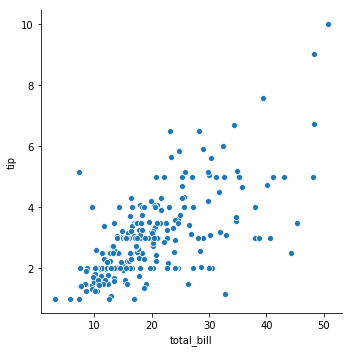

In [7]:
sns.relplot(x="total_bill", y="tip", data=tips);

### 3.1 The `hue` semantic

Scatterplots only show relationships between two variables, but it is often useful to display other dimensions and these can be shown using colors.  We can do highlight a 3rd dimension using hte `hue` argument of `relplot`. The tutorial notes:

> While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:

To examine if there is a relationship between men and women who tip, we can add the `hue` argument and set that to be the label for the `sex` column of tips dataframe:

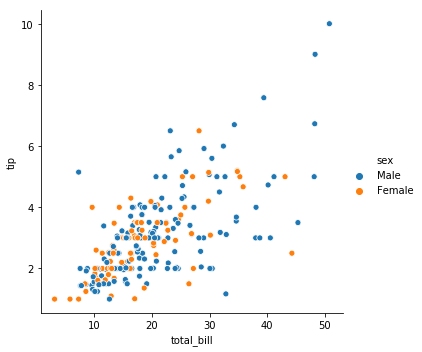

In [8]:
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips);

### 3.2  The `style` semantic

Additional dimensions of the data can be shown using the `style` argument of `sns.relplot`.  It works in the same was as the `hue` argument but instead changes the style of the points in the plot.  The tutorial notes:

> To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class:

Let's change the style of the points dependent if the tipper is a smoker or not:

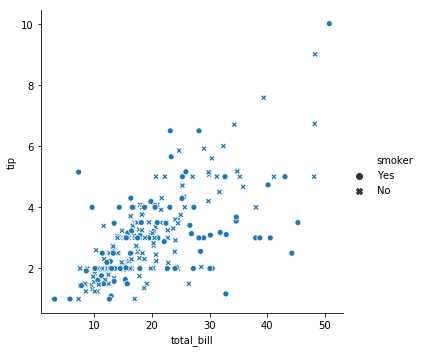

In [9]:
sns.relplot(x="total_bill", y="tip", style="smoker", data=tips);

We can also combine both the `style` and `hue` semantics into a single plot:

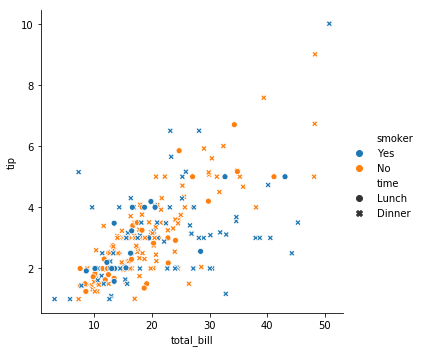

In [10]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

### 3.3 The `size` semantic
Just like the `hue` and `style` we can change the size of the points as well using the `size` argument.  Again, we will provide the label for the column that contains the size information.  The tips data from Seaborn conveniently comes with a column named `size`.  For other datasets you will have to prepare a size column for the data frame.  Let's apply the size:

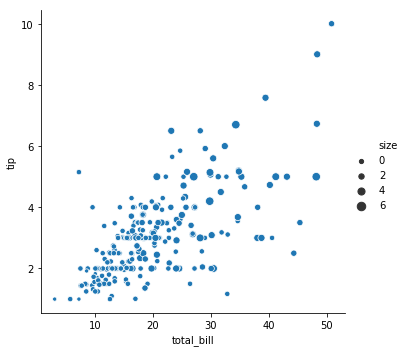

In [11]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

### 3.4 Setting the height and width of the plot
You can control the height and widght of the plot by providing the `height` and `aspect` arguments to `replot`.  The `height` is provided in inches and the `aspect` argument is a factor multipled by the provided height to set the width:

```
  width = aspect * height
```

As an example, we can scale the width of the plot to be twice the height:

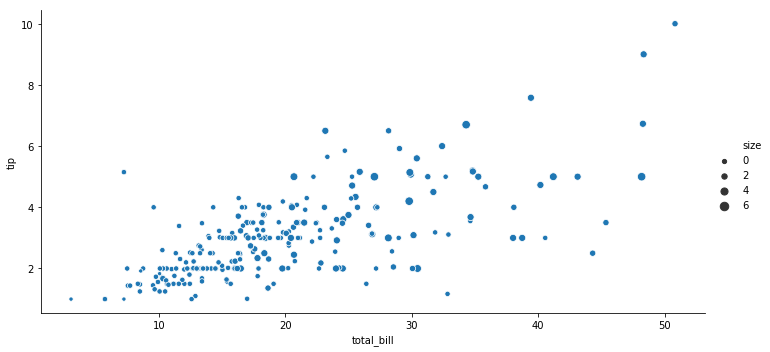

In [15]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips, aspect=2);

#### Task 3a: Using `replotlib`

<span style="float:right; margin-left:10px; clear:both;">![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/96/Apps-gnome-info-icon.png)
</span>

Experiment with the `size`, `hue` and `style` semantics by applying them to another example dataset of your choice.

*You should produce three or more plots for this task.*

---
## 4. Aesthetics
You can control various aspects of the look-and-feel of your plots.  Seaborn provides professional looking aesthetics that you can control including the plot dimensions (size and aspect), built-in attractive styles, and color pa\lettes. Visit the [Seaborn aesthetics documentation](https://seaborn.pydata.org/tutorial/aesthetics.html) to learn more.  There are two types of aesthetics that Seaborn provides:

1. parameters to control the style of the plot
2. parameters for scaling of elements in the plot

As indicated in the online documentation: 
> The interface for manipulating [aesthetics] parameters are two pairs of functions. To control the style, use the `axes_style()` and `set_style()` functions. To scale the plot, use the `plotting_context()` and `set_context()` functions. In both cases, the first function returns a dictionary of parameters and the second sets the matplotlib defaults.




To explore the list of styles that are currently set for the plot we can use call the `sns.axes_style()` function:

In [16]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': (1, 1, 1, 0),
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'patch.force_edgecolor': False,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

To explore the list of parameters that can be used to scale elements of the plat we can call `sns.plotting_context` function

In [17]:
sns.plotting_context()

{'font.size': 10.0,
 'axes.labelsize': 'medium',
 'axes.titlesize': 'large',
 'xtick.labelsize': 'medium',
 'ytick.labelsize': 'medium',
 'legend.fontsize': 'medium',
 'axes.linewidth': 0.8,
 'grid.linewidth': 0.8,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 0.8,
 'ytick.major.width': 0.8,
 'xtick.minor.width': 0.6,
 'ytick.minor.width': 0.6,
 'xtick.major.size': 3.5,
 'ytick.major.size': 3.5,
 'xtick.minor.size': 2.0,
 'ytick.minor.size': 2.0}

### 4.1 Built-in Figure Styles

Seaborn provides five built-in styles for figures:

+ darkgrid
+ whitegrid
+ dark
+ white
+ ticks

The default is 'darkgrid', but you can select from any of these to suit your preference or the need for a given plot. We can set a style using the `sns.set_style()` function prior to creating the plot. Then we can explore the new dictionary of parameters with `sns.axes_style()`.

In [18]:
# Set the style.
sns.set_style('whitegrid')

# View the style dictionary.
sns.axes_style()            

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

Let's create the plot.

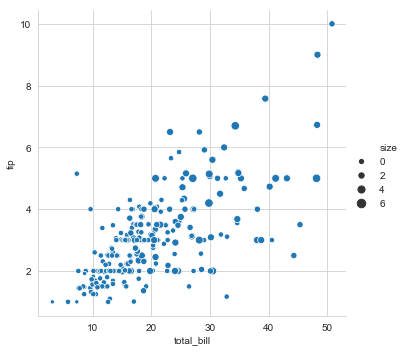

In [19]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

Observe that we now have grid lines.

#### Task 4a: Explore built-in styles

<span style="float:right; margin-left:10px; clear:both;">![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/96/Apps-gnome-info-icon.png)
</span>

Using a dataset of your choice, practice creating a plot for each of these different styles:

+ darkgrid
+ whitegrid
+ dark
+ white
+ ticks

### 4.2 Modifying Built-in Styles

Sometimes the built-in style may need adjustments to suit your liking or the needs of a plot.  You can customize any style using the `sns.set_style` function.  It is often easier to start with a built-in style and modify it for a given purpose. To do this, we pass a Python dictionary as the second argument. The dictionary should specify the style changes. For example, suppose we wanted a darker background?

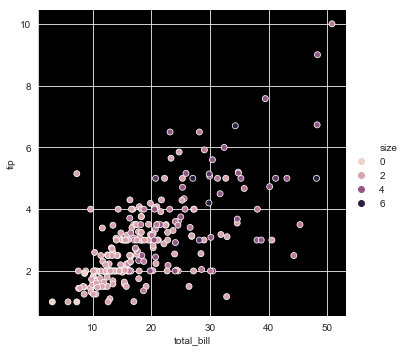

In [20]:
# Create a dictionary with the style settings we wantto adjust.
custom_style = {'figure.facecolor': 'white',
                'axes.facecolor': 'black'}

# Call the set_style function to start with the darkgrid style, but pass in our adjustements.
sns.set_style("darkgrid", custom_style)

# Create the plot.
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

To reset the style to default, simply call `sns.set()`.

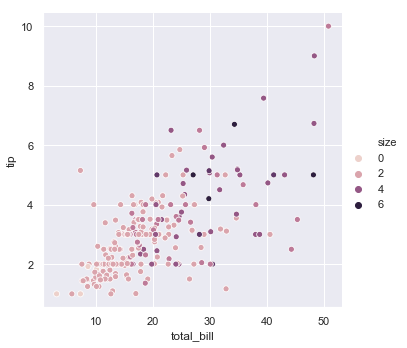

In [21]:
sns.set()  
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

### 4.3 Color Palettes

Color choices are **very** important for conveying meaning, and how to go about choosing 'good' colors is not immediately obvious. Also, when creating figures for publication is is important to consider that some indivduals are color blind and may have difficulty with specific colors.  NASA has [compiled an informative document](https://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/05/subtleties-of-color-part-1-of-6/), providing recommended color palettes.  These are already implemented in `matplotlib`, `seaborn` and other packages.


For an additional reference on Seaborn color palettes see: [Seaborn color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html).  Additionally, [Online tools](http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3) can help develop color maps can be found.


Let's first examine the default palette provided by Seaborn.  This can be returned with a call to `sns.color_palette()`.

In [22]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

The palette is represented in an array of tuples where each tuple is a color and contains three numbers.  Computers use 3 numbers to represent colors, each corresponding to a specific shade of red, green and blue.  Seaborn provides those numbers between the values of 0 and 1. Below is a list of fully saturated colors (e.g. at least one number in the tuple is set to 1) and its meaning:

- (0, 0, 0): black
- (1, 1, 1): white
- (1, 0, 0): red
- (0, 1, 0): green
- (0, 0, 1): blue
- (1, 1, 0): yellow
- (0, 1, 1): cyan
- (1, 0, 1): purple
- etc.,

Fortunately, we have a convenience function named `sns.palplot` to view these colors:

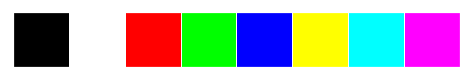

In [23]:
sns.palplot([(0,0,0), (1,1,1), (1,0,0), (0,1,0), (0,0,1), (1,1,0), (0,1,1), (1,0,1)])

Let's use the `sns.palplot` to examine the default Seaborn palette:

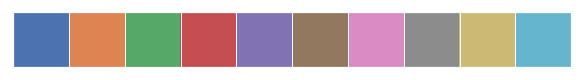

In [24]:
sns.palplot(sns.color_palette())

Let's examine the tips scatterplot to observe the colors.

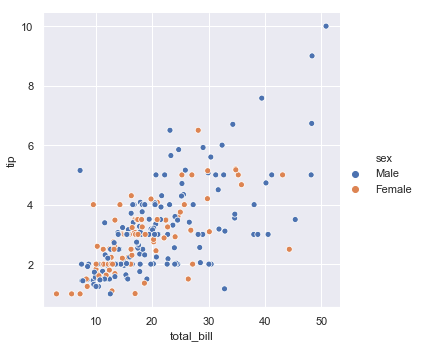

In [25]:
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips);

Observe that the colors are used in order that they appear in the palette.

Seaborn has a short list of built-in palettes:
```python
['deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind']
```
We can create a a palette of of colors from any of these categories by calling the `sns.color_palette` function, passing the palette name and the number of colors from that palette that we need.  For the tips data, if we want to use the `bright` palette we must use two colors--one for each sex:


In [27]:
sns.color_palette('bright', 2)

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0)]

In [29]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

In [30]:
#Use the above to find how many values you need

***Note:*** recall that Seaborn is a set of wrapper functions for `matplotlib`, so it should not be a suprise that we can use any `matplotlib` color map, which you can find [here](https://matplotlib.org/tutorials/colors/colormaps.html).

Let's try again creating a plot with a dark-background plot but with a more vibrant palette of colors.  You set a palette for a plot by providing it to the plotting function.  In the case of the `sns.replopt` function we can provide colos using the `palette` argument.  First let's use a palette from Seaborn. Let's color the tips data by the size amounts.  From previous plots we know we have 6 colors:

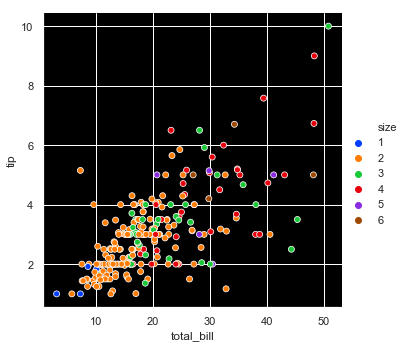

In [26]:
# Create a dictionary with the style settings we wantto adjust.
custom_style = {'figure.facecolor': 'white',
                'axes.facecolor': 'black'}

# Call the set_style function to start with the darkgrid style, but pass in our adjustements.
sns.set_style("darkgrid", custom_style)

# Create the plot.
colors=sns.color_palette('bright', 6)
sns.relplot(x="total_bill", y="tip", hue="size", data=tips, palette=colors);

If we provide palettes with names, such as from matplot lib we don't need to know how many colors are required. Here, we'll use the 'Accent' palette from matplotlib:

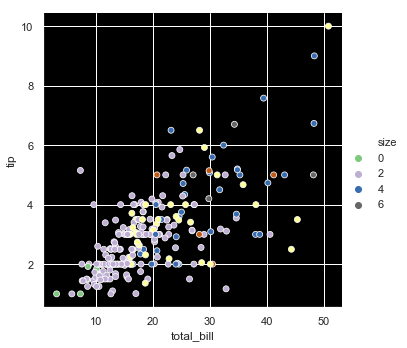

In [32]:
# Create a dictionary with the style settings we wantto adjust.
custom_style = {'figure.facecolor': 'white',
                'axes.facecolor': 'black'}

# Call the set_style function to start with the darkgrid style, but pass in our adjustements.
sns.set_style("darkgrid", custom_style)

# Create the plot.
sns.relplot(x="total_bill", y="tip", hue="size", data=tips, palette='Accent');

Before continuing let's rest our plots style

In [33]:
sns.set()

### 4.4 Temporarily setting a style

At the end of the previous section we had to remember to reset any style changes that we made using a call to `sns.set`.  However, we can use a  `with` statement to [temporarily set a figure style](https://seaborn.pydata.org/tutorial/aesthetics.html#temporarily-setting-figure-style). This feature allows for any style changes to be lost upon exiting the `with` context manager.  For example:

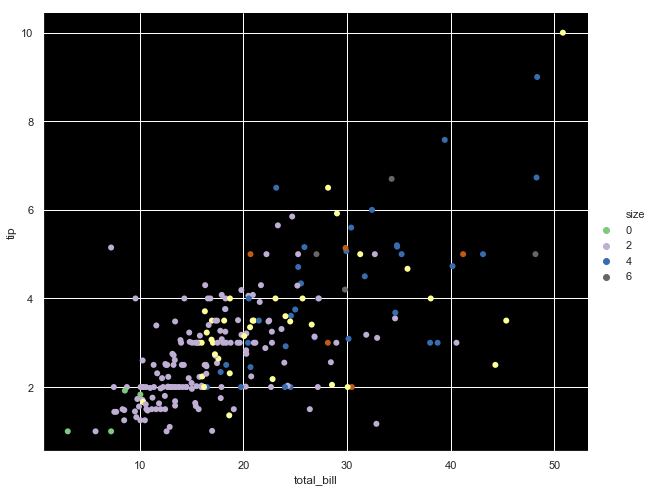

In [34]:
# Create style dictionary:
my_style_options = {'figure.facecolor': 'white',
                    'axes.facecolor': 'black'}

# Apply style changes temporarily.
with sns.axes_style("darkgrid", rc=my_style_options):
    sns.relplot(x="total_bill", y="tip", hue="size", data=tips, 
                palette='Accent',    # Change the color.
                edgecolor="none",  # Remove the white outline.
                height=7, aspect=1.2); 

There are context managers for color palettes and figure styles that can be used as well, see:
+ [sns.plotting_context](https://seaborn.pydata.org/generated/seaborn.plotting_context.html#seaborn.plotting_context)
+ [sns.color_palette](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette)
+ [sns.axes_style](https://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style)

#### Task 4b

<span style="float:right; margin-left:10px; clear:both;">![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/96/Apps-gnome-info-icon.png)
</span>

Experiment with the style options and palettes introduced above. Create and demonstrate a style of your own using a dataset of your choice.

## 5. Wrap-up

During this tutorial we covered only the `sns.retplot` function.  However, Seaborn offers a variety of  functions for different types of plots.  For Task 2b you explored some examples in the Seaborn Gallery. Now that you know the basics you should be able to apply what you have learned to other types of plots. 

### Task 5a

<span style="float:right; margin-left:10px; clear:both;">![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/96/Apps-gnome-info-icon.png)
</span>

Examine the [Seaborn gallery](https://seaborn.pydata.org/examples/index.html) and find **two to four plots** types that interest you. Re-create a version of those plots using a different data set (make any other style changes you wish).

*Complete as much as this task as you can, try for at least two complete plots. If you need some help in class that is completely fine, but be prepared to describe what you are trying to do, and what you tried, as well as the error or problem you observe.*

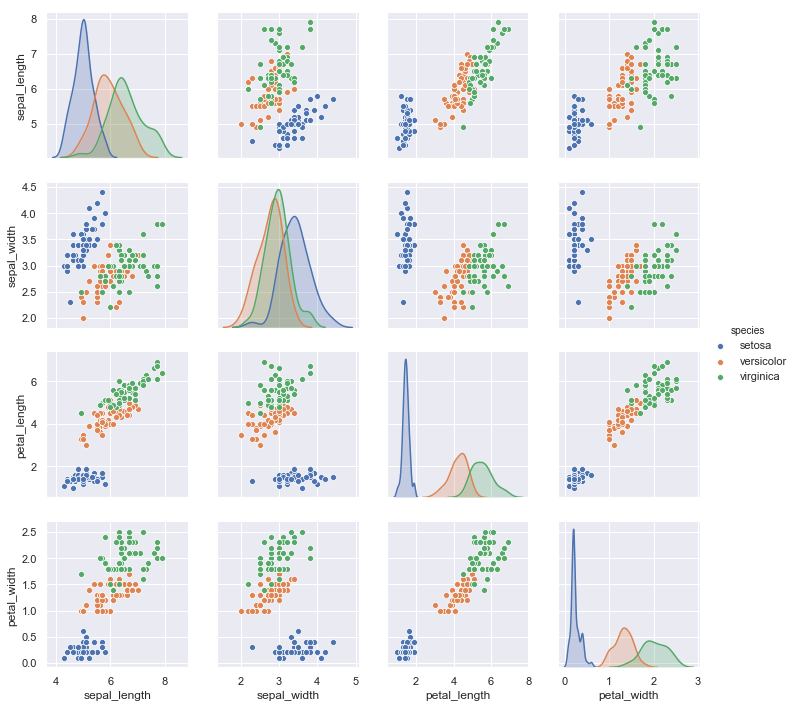

In [35]:
df = sns.load_dataset('iris')
sns_plot = sns.pairplot(df, hue='species' , height=2.5)
sns_plot.savefig("output.png")